In [1]:
#import pandas as pd

#df = pd.read_csv('mnist_test.csv')



In [24]:
import keras         #keras is an API
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)


(60000, 28, 28)


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
x_train.shape           #60000 examples of nos in 28x28 pixels
#print(x_train[:2])
print(x_train[0].shape)

(28, 28)


In [5]:
print("Training label shape : ", y_train.shape  )
print("firts 5 train labels : ", y_train[:5])

Training label shape :  (60000,)
firts 5 train labels :  [5 0 4 1 9]


In [26]:
#pre-processing to improve images can be done, good practice

#When we’re making predictions about categorical data (as opposed to values from a continuous range), 
#the best practice is to use a “one-hot encoded” vector. This means that we create a vector as long as the
#number of categories we have, and force the model to set exactly one of the positions in the vector to 1 and
#the rest to 0 (the single 1 is the “hot” value within the vector).

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [27]:
print(y_train.shape)
print(y_train[:5])
print(y_test[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
#loss function : categorical cross entropy
#optim func : stochastic gradient descent
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

#model = Sequential()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
#model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
#model.add(Dense(units=num_classes, activation='softmax'))
#model.summary()




In [9]:
#model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
#history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
#loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
#import matplotlib.pyplot as plt
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['training', 'validation'], loc='best')
#plt.show()
#
#print(f'Test loss: {loss:.3}')
#print(f'Test accuracy: {accuracy:.3}')

In [12]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


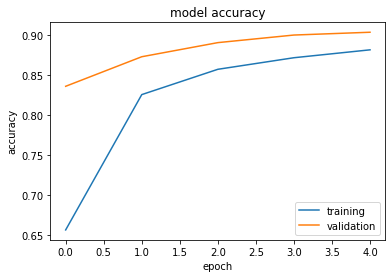


Test loss: 0.464
Test accuracy: 0.891
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


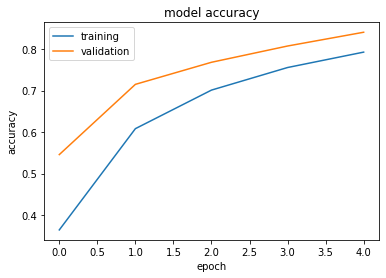


Test loss: 1.2
Test accuracy: 0.826
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


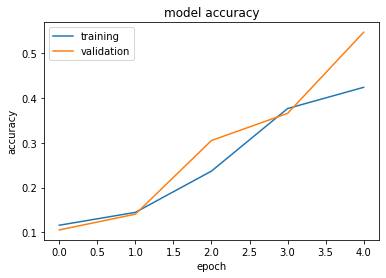


Test loss: 2.16
Test accuracy: 0.538
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


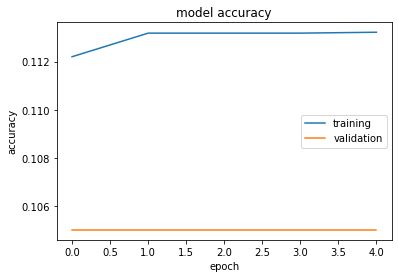


Test loss: 2.29
Test accuracy: 0.113


In [14]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


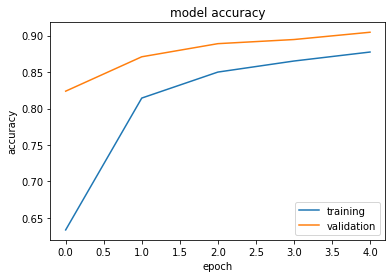


Test loss: 0.5
Test accuracy: 0.882
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


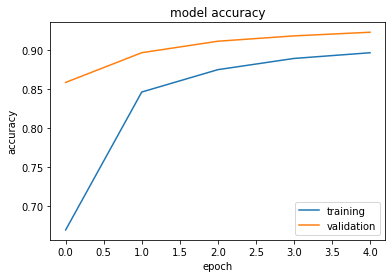


Test loss: 0.373
Test accuracy: 0.907
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


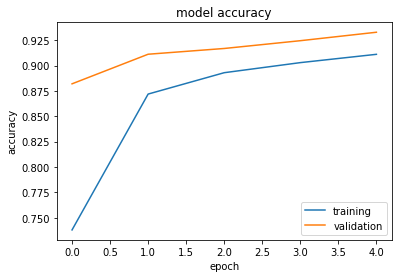


Test loss: 0.31
Test accuracy: 0.919
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


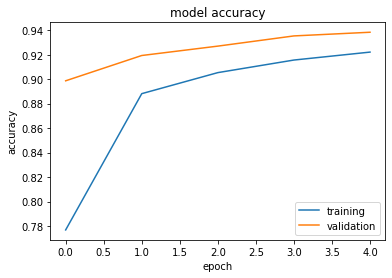


Test loss: 0.274
Test accuracy: 0.924
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


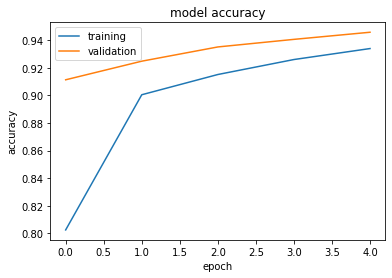


Test loss: 0.242
Test accuracy: 0.933
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


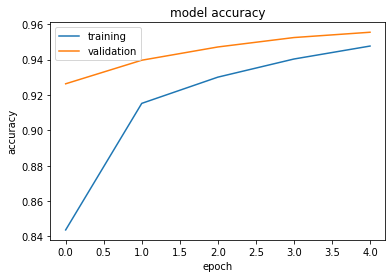


Test loss: 0.204
Test accuracy: 0.945
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_56 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


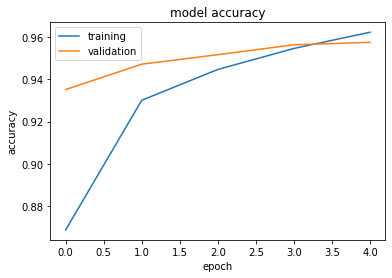


Test loss: 0.177
Test accuracy: 0.949


In [15]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

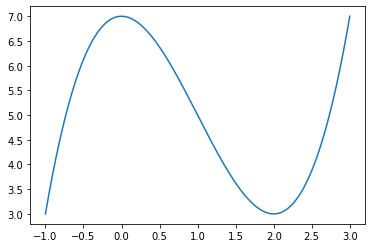

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#We will find the gradient decent of this function - $ f(x) = x^3-3x^2+7$

#creating the function and plotting it 

function = lambda x: (x ** 3)-(3 *(x ** 2))+7

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,500)

#Plot the curve
plt.plot(x, function(x))
plt.show()



# Gradient Descent :

In [20]:
def deriv(x):
    
    '''
    Description: This function takes in a value of x and returns its derivative based on the 
    initial function we specified.
    
    Arguments:
    
    x - a numerical value of x 
    
    Returns:
    
    x_deriv - a numerical value of the derivative of x
    
    '''
    
    x_deriv = 3* (x**2) - (6 * (x))
    return x_deriv

In [21]:
def step(x_new, x_prev, precision, l_r):
    
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_new - a starting value of x that will get updated based on the learning rate
    
    x_prev - the previous value of x that is getting updated to the new one
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    
    x_list, y_list = [x_new], [function(x_new)]
    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
        
        # change the value of x
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x = - deriv(x_prev)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (l_r * d_x)
        
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(function(x_new))

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    
    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Local minimum occurs at: 1.9980265135950486
Number of steps: 25


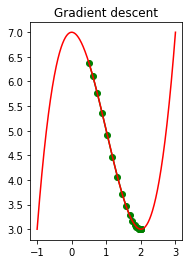

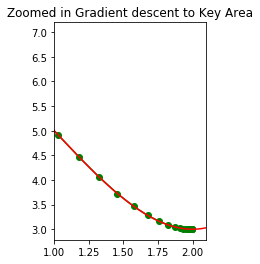

In [22]:


#Implement gradient descent (all the arguments are arbitrarily chosen)

step(0.5, 0, 0.001, 0.05)

